In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.dummy import DummyClassifier

/usr/lib64/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataset1 = pd.read_csv('span_feb_28.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>=30.0) & (dataset1['final_teamsize'] >= 2)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>=30.0) & (dataset1['final_teamsize'] >= 2)]
print(data_neg.shape)
print(data_pos.shape)

(8086, 100)
(2461, 100)


In [2]:
dataset = pd.read_csv('span_feb_28.csv',delimiter = ',')
dataset = dataset.loc[(dataset['proj_span'] >= 30.0) & (dataset['final_teamsize'] >= 2)]


In [3]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(10547, 100)

In [5]:

dataset.describe()

,activity_intensity,activity_intensity_Q1,activity_intensity_Q2,activity_intensity_Q3,activity_intensity_Q4,class,contribution_30_10_percentage,contribution_50_30_percentage,contribution_below_10_percentage,contribution_over_50,...,num_TeamAdd_Q4,num_Watch,num_Watch_Q1,num_Watch_Q2,num_Watch_Q3,num_Watch_Q4,num_joint_project,num_joint_success_project,proj_span,team_age_in_days
count,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,...,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000
mean,0.215348,0.259294,0.210542,0.210691,0.206053,0.233336,0.091162,0.123078,0.074800,0.690338,...,0.018773,2.070541,1.906324,1.773206,1.870769,1.886887,1.210581,0.276287,342.222338,9.024746
std,0.589705,1.313745,0.602704,0.636025,0.525491,0.422975,0.178907,0.273893,0.155117,0.462376,...,0.155280,12.556466,11.399548,10.519051,11.623849,11.654193,1.002902,0.620078,331.719348,70.727458
min,0.001468,0.001468,0.001468,0.001468,0.001468,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000
25%,0.027027,0.027145,0.026857,0.026882,0.025381,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,97.000000,0.000000
50%,0.070796,0.071429,0.069790,0.070000,0.067524,0.000000,0.000000,0.000000,0.006061,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,227.000000,0.000000
75%,0.195079,0.200000,0.187500,0.189798,0.184333,0.000000,0.111111,0.076923,0.076923,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,475.000000,0.000000
max,29.613683,108.911357,25.500000,38.789862,15.625000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,607.000000,607.000000,607.000000,607.000000,607.000000,26.000000,25.000000,1800.000000,1590.000000


In [4]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=20190101)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20190101)
print('training size: ', X_tr.shape[0])
print('validation size: ', X_val.shape[0])
print('test size: ', X_test.shape[0])

training size:  6327
validation size:  2110
test size:  2110


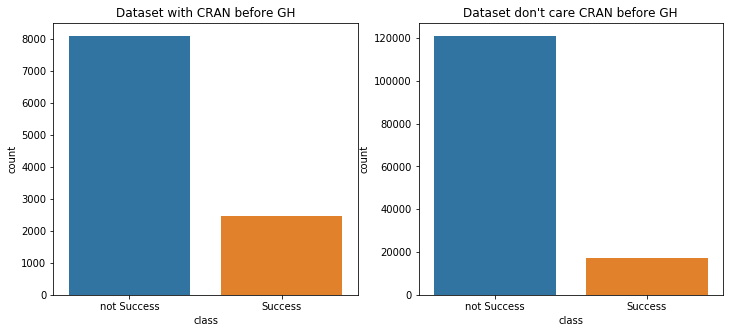

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [5]:
d = DummyClassifier(strategy='most_frequent')
d.fit(X_tr, y_tr)
ca = d.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = d.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = d.score(X_val, y_val)
y_pred = d.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
ca = d.score(X_test, y_test)
y_pred = d.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.77398
Precision on train: 0.00000
Recall on train: 0.00000

Classification accuracy of the LogisticRegression classifier on val set: 0.74787
Precision on val: 0.00000
Recall on val: 0.00000

Classification accuracy of the LogisticRegression classifier on test set: 0.76351
Precision on val: 0.00000
Recall on val: 0.00000


/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.81097
Precision on train: 0.73780
Recall on train: 0.25385

Classification accuracy of the LogisticRegression classifier on val set: 0.78720
Precision on val: 0.74850
Recall on val: 0.23496


array([[1486,  125],
       [ 457,   42]])

In [10]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-1.46247303e-01 -1.69863342e-01 -1.43627767e-01 -1.44630022e-01
  -1.40829671e-01 -6.53113734e-02 -9.01481077e-02 -2.38951614e-02
  -3.82085838e-01 -2.91641881e-02 -2.91641881e-02 -2.73398635e-01
  -3.68333308e-01  8.51070708e-07 -3.72590560e-02 -3.33869339e-02
  -3.31591208e-02 -3.25406470e-02 -4.17882942e-02  3.32409374e-02
   8.04508943e-03 -9.44111682e-03  6.44812423e-02  2.25209418e-02
  -5.07680214e-02 -3.66538947e-02 -2.37326038e-02 -1.60719512e-02
  -4.13314450e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.11362767e-02 -3.69526140e-02
  -5.53859119e-02 -1.40073816e-04  2.21470373e-02 -2.97633079e-02
  -3.10159812e-04 -8.97210430e-02  6.78788505e-03  1.38024003e-02
   4.69265551e-02  4.43008813e-02 -5.29647097e-02 -7.66670017e-02
  -1.07209782e-02  3.08038569e-02  6.64118189e-02  1.29539833e-02
   1.27246644e-02 -3.28088580e-03 -7.40540156e-02 -7.18173201e-02
  -6.21950418e-02 -6.73629703e-02 -7.12013117e-02 -2.83300481e-02
  -2.78866

In [11]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [13]:
# lr = LogisticRegression(solver='lbfgs')
# lr.fit(X_tr, y_tr)
# predictions = lr.predict(X_tr)
# params = np.append(lr.intercept_, lr.coef_)
# newX = pd.DataFrame({"Constant":np.ones(len(X_tr))}).join(pd.DataFrame(X_tr.reset_index(drop=True)))
# MSE = (sum((y_tr-predictions)**2))/(len(newX)-len(newX.columns))


# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
# ts_b = params/ sd_b
# print(newX)
# p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

# sd_b = np.round(sd_b,3)
# ts_b = np.round(ts_b,3)
# p_values = np.round(p_values,3)
# params = np.round(params,4)

# myDF3 = pd.DataFrame()
# myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
# print(myDF3)

In [14]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [15]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)



In [16]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.99542
Precision on train: 0.98883
Recall on train: 0.99091

Classification accuracy of the LogisticRegression classifier on val set: 0.98910
Precision on val: 0.97393
Recall on val: 0.98308


In [17]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-8.35170437e-02  9.30521023e-03  7.77322483e-02  3.23467558e-02
  -4.35336860e-02  9.03546975e-02  2.76022360e-01  3.28259867e-02
  -5.63247270e-02  4.47699568e-03  4.47699568e-03  2.47416219e-02
   2.66628748e-01  1.86052317e-01 -1.37109849e-02 -3.25581461e-02
   4.16290209e-02  5.44920882e-02 -4.90668583e-02  1.39809107e-02
   1.23091523e-02  4.98584023e-02  6.79829599e-02  8.49305294e-02
  -7.83235859e-02 -1.08337925e-02  4.34176403e-02 -7.73502239e-02
  -4.76199790e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.18839566e-02 -1.16194878e-02
  -7.44994480e-02 -1.03435272e-02 -3.44321077e-01 -5.14497134e-02
   5.98626274e-02 -7.63779417e-02  5.11482407e-02  4.53160113e-02
   5.75370957e-02  8.10243075e-02  3.33909180e-01 -8.59981526e-02
  -1.06214554e-01  1.90329238e-01  8.68953337e-02 -2.78115851e-01
  -1.30994724e-01 -1.36854564e-01  6.64842389e-02 -5.14699475e-02
  -8.44162399e-02  1.99006764e-01 -6.09039162e-02  3.63471874e-02
   6.13974

In [18]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [19]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Accuracy score on the training dataset: 1.0
Precision on train: 1.00000
Recall on train: 1.00000

Accuracy score on the val dataset: 0.99005
Precision on val: 0.96203
Recall on val: 1.00000


In [21]:
# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Accuracy score on the test dataset: 0.99194
Precision on test: 0.96887
Recall on test: 0.99800


In [22]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [23]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_joint_success_project
2. normalized_proj_span
3. proj_span
4. activity_intensity_Q3
5. activity_intensity_Q4
6. activity_intensity_Q1
7. activity_intensity
8. activity_intensity_Q2
9. max_contribution_percentage
10. num_Create_Q1


In [24]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [25]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [26]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.98957
Radial Basis Function SVC classification accuracy on val set: 0.96825


In [27]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Precision on train: 0.98164
Recall on train: 0.97203
Precision on val: 0.96970
Recall on val: 0.90226


In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


MLP classification accuracy on training set: 0.99716
Precision on train: 0.98892
Recall on train: 0.99860

MLP classification accuracy on validation set: 0.98910
Precision on val: 0.97570
Recall on val: 0.98120


In [29]:
from sklearn.neural_network import MLPClassifier
test = np.repeat(10,200)
print(test)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(test), random_state=201902)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
ca = mlp.score(X_tr, y_tr)
print('\nMLP classification accuracy on training set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
ca = mlp.score(X_val, y_val)
print('\nMLP classification accuracy on validation set: {:.5f}'.format(ca))
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10]

MLP classification accuracy on training set: 0.77398
Precision on train: 0.00000
Recall on train: 0.00000

MLP classification accuracy on validation set: 0.74787
Precision on val: 0.00000
Recall on val: 0.00000


/usr/lib64/python3.4/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
